In [14]:
import pandas as pd

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [3]:
df = pd.read_csv('aa.csv', sep=',')

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,experimentVariant,category,mobileBrandName,version,operatingSystem,region,purchase
0,0,1,0,mobile,Huawei,3.8.2.0,ANDROID,Moscow,0
1,1,2,0,mobile,NaN,3.8.2.0,ANDROID,Krasnodar Krai,0
2,2,3,1,tablet,Apple,2.8.0,IOS,Moscow Oblast,0
3,3,4,1,mobile,Xiaomi,3.8.2.0,ANDROID,Rostov Oblast,0
4,4,5,1,mobile,Samsung,3.8.2.0,ANDROID,Republic of Tatarstan,0
...,...,...,...,...,...,...,...,...,...
368271,368271,368272,0,mobile,Apple,2.8.0,IOS,Moscow,0
368272,368272,368273,0,mobile,Apple,2.8.0,IOS,Volgograd Oblast,0
368273,368273,368274,1,mobile,Apple,2.9.0,IOS,Moscow,0
368274,368274,368275,1,mobile,Apple,2.8.0,IOS,Moscow,0


In [12]:
df.groupby(['experimentVariant', 'region'], as_index = False).agg({'purchase': 'mean'})

,experimentVariant,region,purchase
0,0,Abkhazia,0.100000
1,0,Adjara,0.000000
2,0,Adygea Republic,0.070039
3,0,Akmola Province,0.000000
4,0,Aktobe Province,0.000000
...,...,...,...
314,1,Voronezh Oblast,0.088333
315,1,Yamalo-Nenets Autonomous Okrug,0.051724
316,1,Yaroslavl Oblast,0.056180
317,1,Zabaykalsky Krai,0.097199


In [17]:
np.mean([0, 1, 1, 0, 1])

0.6

  0%|          | 0/1000 [00:00<?, ?it/s]

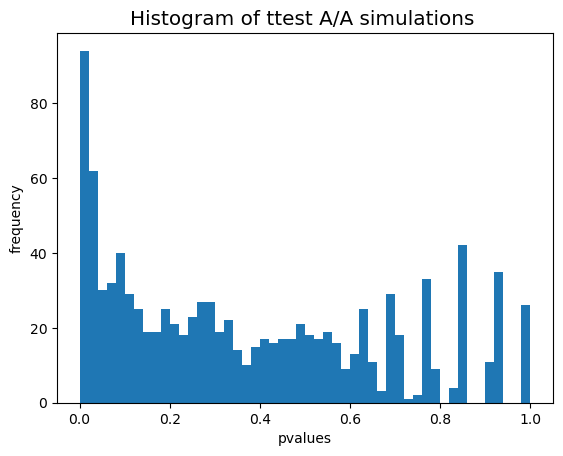

0.177

In [7]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant == 1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df.experimentVariant == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
df[]

In [8]:
df[(df.experimentVariant ==1)&(df.operatingSystem != 'IOS')]['purchase']

3         0
4         0
6         0
48        1
50        1
         ..
368246    0
368248    0
368249    0
368250    0
368251    0
Name: purchase, Length: 130747, dtype: int64

  0%|          | 0/1000 [00:00<?, ?it/s]

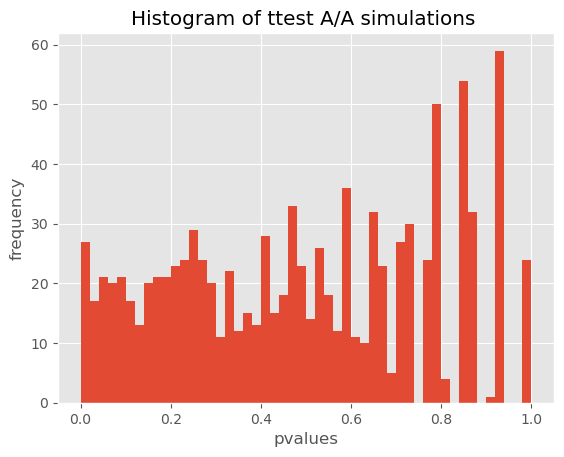

0.057

In [9]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant ==1)&(df.operatingSystem != 'IOS')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant ==1)&(df.operatingSystem != 'IOS')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations